## Guidelines
Please complete the assignment inside this notebook. Make sure the code can be executed easily.

- For question 1 and 2, 
    - write production-ready code using OOP when relevant.
    - create simple unit tests for your code where applicable.
    - add comments and documentation strings for important methods. 
    - discuss your design choices and discuss the complexity (Big O notation) of your solutions, both memory wise and performance wise. Provide map visualization when relevant
    - Try to stick to the most popular scientific Python libraries.
    - Use the provided csv files.
- For question 2, use map vizualisastion
- For question 3, no code implementation is needed

## Input data for Q1 and Q2
You should have received three csv files. Each csv-file represents the locations where a person was stationary for a certain amount of time. 
The csv-files contain the following fields:

- Latitude: The latitude of the detected GPS coordinates Longitude: The longitude of the detected GPS coordinates
- Timestamp: The start time of the stationary in the following format:
    - YYYY = year
    - MM = month of year
    - dd = day of month
    - HH=hourofday
    - mm = minute of hour
    - Z = timezone offset
- Duration: The length of time the person was stationary (in milliseconds)
    
Questions 1 and 2 in this assignment are related to this data.

In [1]:
#import libraries
import pandas as pd
import glob
from joblib import Parallel, delayed
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):
    return x

#List files
data_files = glob.glob("person*.csv")

#define function to load all tracking data of a person
def load_csv(data_file):
    data = pd.read_csv(data_file,sep = ';')
    data['person'] = data_file.replace('.csv', '')
    return(data)

In [2]:
#load Data of all persons into a single dataframe
#joblib enables parallel much faster #overkill here
files = Parallel(n_jobs=10)(delayed(load_csv)(x) for x in data_files)

data_tracking = pd.concat(files,axis = 0)

#change the columns to pandas supported data types
data_tracking['start_time'] = (pd.to_datetime(
    data_tracking['start_time(YYYYMMddHHmmZ)']) 
                              + pd.DateOffset(hours=1)) #offset necesascary correction
data_tracking['duration'] = pd.to_timedelta(data_tracking['duration(ms)'],unit = 'ms')
data_tracking

,latitude,longitude,start_time(YYYYMMddHHmmZ),duration(ms),person,start_time,duration
0,51.057022,3.714476,201312250036+0100,19593588,person2,2013-12-25 00:36:00,05:26:33.588000
1,51.056984,3.714681,201312250608+0100,30460679,person2,2013-12-25 06:08:00,08:27:40.679000
2,51.038406,3.729655,201312251451+0100,964169,person2,2013-12-25 14:51:00,00:16:04.169000
3,50.880190,4.251147,201312251514+0100,262475,person2,2013-12-25 15:14:00,00:04:22.475000
4,50.861668,4.475020,201312251524+0100,64461,person2,2013-12-25 15:24:00,00:01:04.461000
5,50.879230,4.666252,201312251531+0100,68925,person2,2013-12-25 15:31:00,00:01:08.925000
6,50.997192,4.802296,201312251541+0100,11998026,person2,2013-12-25 15:41:00,03:19:58.026000
7,50.997192,4.802296,201312251907+0100,18114776,person2,2013-12-25 19:07:00,05:01:54.776000
8,50.997192,4.802300,201312260015+0100,35447860,person2,2013-12-26 00:15:00,09:50:47.860000
9,51.166862,4.782439,201312261036+0100,63484,person2,2013-12-26 10:36:00,00:01:03.484000


In [3]:
#data_tacking.groupby('person')['start_time'].apply(lambda x: ', '.join(x.dt.date.unique().astype('str')))
#making a data frame of places that can be used for checks of person being at a place
places = data_tracking[['longitude','latitude']].sample(20).reset_index(drop = True)
places['place'] = 'place_' + places.index.astype('str')

## Question 1: Data lookup
Create a method that generates a lookup table allowing us to effiently check whether or not a user has ever visited a location even if the new location is not exactly the same as the visited location (some noise is added to the longitude/latitude pairs). Data to be used are in the provided csv files.

In [4]:
#use DBSCAN to determine a locality of specified diameter. These locations are assumed to be unique location visited

#Harversine distance used for DBSCAN

#Inspired by the follozing blog post

#https://geoffboeing.com/2014/08/clustering-to-reduce-spatial-data-set-size/

#Cluster is locality

import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from geopy.distance import great_circle
from shapely.geometry import MultiPoint
import unittest

#define function that returns pandas dataframe with clusters(location), number of times the person has been there 

def return_clusters_revisits(data_tracking, error):
    #df = pd.read_csv('summer-travel-gps-full.csv')
    coords = data_tracking[['latitude', 'longitude']]
    meters_per_radian = 6371008.8
    epsilon = float(error) / meters_per_radian
    print('Epsilon: {}'.format(epsilon))
    db = DBSCAN(eps=epsilon, min_samples=1, algorithm='ball_tree', metric='haversine').fit(np.radians(coords))

    cluster_labels = db.labels_
    
    #get cluster(locations) counts across all persons
    cluster_counts = np.unique(cluster_labels,return_counts= True)
    
    cc_df = pd.DataFrame({'cluster':cluster_counts[0], 'count' :cluster_counts[1]})

    num_clusters = len(set(cluster_labels))
    clusters = pd.Series([coords[cluster_labels == n] for n in range(num_clusters)])

    data_tracking['cluster'] = db.labels_
    
    #calculate the centroid of the clusters
    cluster_centroids = data_tracking.groupby('cluster')['latitude', 'longitude'].mean().reset_index(0).rename(dict((x, 'centroid_' +x) for x in ['latitude', 'longitude']), axis = 1)
    
    data_tracking = pd.merge(data_tracking,cluster_centroids, how = 'outer', on = 'cluster')
    
    position_counts = pd.merge(data_tracking, cc_df,how = 'left', on = 'cluster').drop(['start_time(YYYYMMddHHmmZ)','duration(ms)'], axis = 1)
    
    position_counts_person = data_tracking.groupby(['person', 'cluster'])['duration'].count().reset_index().rename({'duration': 'count_per_person'}, axis = 1)
    
    final_counts = pd.merge(position_counts,position_counts_person, how = 'outer')
    
    final_counts['previous_visit'] = final_counts['count_per_person'] > 0
    
    print('Number of clusters: {}'.format(num_clusters))
    return(final_counts)


## Question 2: Home and work detection
The goal of this question, is to design and implement an algorithm that allows us to distinguish the likely home locations of a user from his likely work locations.

Note that a person might have multiple home and work locations, or might not have a work location at all. Also note that the data might be noise, incorrect and/or incomplete.

Discuss your choice of algorithms, rules, methods, distance measures, etc.

Data to be used are in the provided csv files.

In [5]:
#Hypothesis is that the person spends only Monday through friday at work location and weekends at home
#Design heuristics based on average start_time and duration per day spent at the locations generated by DBSCAN

def weekday_weekend_durations(revisits):
    revisits['weekend'] = 'workday'
    revisits['weekend'][revisits.start_time.dt.weekday > 4] = 'weekend'
    revisits['duration_mins'] = (revisits.duration.dt.total_seconds()/60).astype('int')
    revisits['start_mins_of_day'] = revisits.start_time.dt.hour*60 + revisits.start_time.dt.minute


    #create a number of working days for each person 
    index_cols=['person', 'cluster', 'centroid_latitude', 'centroid_longitude', 'count', 'count_per_person']
    #calculate average duration spent at place during the week and weekends 
    revisits_pivot = revisits.pivot_table(index = index_cols,
                                          columns = 'weekend',
                               values=['duration_mins','start_mins_of_day'],
                               aggfunc=['mean', 'std'], #'min', 'max', 'count'
                               fill_value = 0.0, dropna=False).reset_index()
    revisits_pivot.columns = ['_'.join(x).rstrip('_') for x in revisits_pivot.columns]
    
    return(revisits_pivot)

In [6]:
#Normalising the data to perform PCA on the data

from sklearn.preprocessing import StandardScaler

def pca_locataion(revisits_pivot):
    index_cols=['person', 'cluster', 'centroid_latitude', 'centroid_longitude']

    #standard deviations are null when 

    no_null_pivot = revisits_pivot.dropna().reset_index()

    x = StandardScaler().fit_transform(no_null_pivot.drop(index_cols, axis = 1))
                                       #.drop(index_cols, axis = 1))

    #check if PCA will reveal any patterns based on [mean, standard deviation, min, max] of start_time and duration in a day per location(DBSCAN) Location)  
    from sklearn.decomposition import PCA
    from sklearn.cluster import KMeans

    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal_component_1', 'principal_component_2'])
    revisits_pca = pd.concat([no_null_pivot,principalDf], axis = 1)
    revisits_pca.plot.scatter(x='principal_component_1', y = 'principal_component_2')
    return(revisits_pca)

#apply kmeans assuming 6 clusters on the principle components on visual inspection of the principle components plot
#DBSCAN is also a choice however determining epsilon parameter automatically is more work
from sklearn.cluster import KMeans

def get_likely_work_home(revisits_pca,k):
    principalDf = revisits_pca[['principal_component_1', 'principal_component_2']]
    kmeans = KMeans(n_clusters=k, random_state=0).fit(principalDf)
    revisits_pca['kmeans_cluster'] = kmeans.labels_
    kmeans_cluster_centres = revisits_pca.groupby(['kmeans_cluster'])[['mean_duration_mins_weekend',
       'mean_duration_mins_workday']].mean().reset_index()
    
    #Cluster with maximum 
    home_cluster = kmeans_cluster_centres.kmeans_cluster[(kmeans_cluster_centres.mean_duration_mins_weekend
                               + kmeans_cluster_centres.mean_duration_mins_workday).idxmax()]
    work_cluster = kmeans_cluster_centres.kmeans_cluster[(kmeans_cluster_centres.mean_duration_mins_workday
                               - kmeans_cluster_centres.mean_duration_mins_weekend).idxmax()]
    output = revisits_pca.loc[revisits_pca.kmeans_cluster.isin([home_cluster, work_cluster])]
    output['home_work'] = 'work'
    output['home_work'][revisits_pca.kmeans_cluster.isin([home_cluster])] = 'home'
    
    output = output[['person', 'cluster', 'centroid_latitude', 'centroid_longitude', 'home_work', 
       'count', 'count_per_person', 'mean_duration_mins_weekend',
       'mean_duration_mins_workday']]
    
    return(output)
#print(revisits_pca[revisits_pca['principal component 2']>0])

Epsilon: 0.0001255688110178093
Number of clusters: 174


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-doc

,person,cluster,centroid_latitude,centroid_longitude,home_work,count,count_per_person,mean_duration_mins_weekend,mean_duration_mins_workday
4,person1,127,-49.326966,-72.890747,work,6,6,0.000000,236.333333
9,person1,141,-54.808989,-68.314143,work,49,49,0.000000,53.530612
11,person1,151,-25.624456,-54.550570,home,8,8,260.750000,515.750000
15,person1,157,51.172225,4.349551,home,167,167,321.277778,336.849558
22,person1,170,51.448472,5.491746,work,3,3,0.000000,143.000000
26,person2,5,50.997187,4.802321,work,8,8,0.000000,235.000000
27,person2,8,51.212713,4.399368,home,851,545,193.473333,189.308861
67,person3,84,50.951118,4.889895,home,96,96,254.848485,379.888889
82,person3,119,51.042057,4.389605,home,3,3,810.000000,400.000000


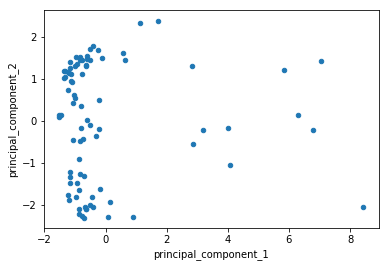

In [7]:
#determine the localities based on DBSCAN with radius of 400M
revisits = return_clusters_revisits(data_tracking, 800)

#Calculate [mean, standard deviation, min, max] of start_time and duration in a day per location(DBSCAN) 
revisits_pivot = weekday_weekend_durations(revisits)
revisits_pca = pca_locataion(revisits_pivot)

#Display Persons home 
get_likely_work_home(revisits_pca, 6)


## Question 3: Design a data refresh system
Have a look at the Foursquare API, more specifically, the Venues search route at
https://developer.foursquare.com/docs/venues/search
Design a system that can receive a location fix (as a [latitude, longitude, accuracy] mobile GPS fix) and run
an algorithm to find the actual venue a user has visited using Foursquare as a venues-database. The design
should minimize the use of calls to the Foursquare API and include a way to refresh Foursquare results as
data retrieved from Foursquare can only be kept for a maximum of 30 days.

Keep in mind the definition of accuracy for a mobile GPS fix. Accuracy is represented in meter and means
that there is a 68% probability that a user is within a radius of that amount of meter around the provided
[latitude, longitude] coordinates. See Android docs:
https://developer.android.com/reference/android/location/Location.html#getAccuracy()

Additionally, visiting a place is highly unlikely to yield the exact same locations (again as [latitude, longitude]
pairs) on consecutive visits. Small variations are to be expected.

The goal of this assignment is to explain the software/systems design for this component. Please
provide one or more diagrams and accompanying text.
Note: The algorithm to map a location to a venue from a list of candidates can be considered as given.

For bonus points: provide your ideas on what this algorithm could look like.

In [8]:
import requests

#leverage locations determined by DBSCAN earlier to fetch the data

url_endpoint = """https://api.foursquare.com/v2/venues/search"""
header_secret = {'client_id' : "CLIENT_ID", 'client_secret' : "CLIENT_SECRET" }
search_params = {'v':'20180323',
                 'client_id' : "MO1DKU2EFJY1JLL2Y1A3GMKWCSZRFX5BWE4B30BFUMWGDBCY", 
                 'client_secret' : "CK0H4AAN23O5J4PYEJNQRO15D5BZ43IBYTHJWSVBPPVSNQZ2" ,
                 'll': '44.3,37.2'}

response = requests.get(url=url_endpoint, params = search_params)

In [9]:
pd.DataFrame(response.json()['response']['venues'])

,beenHere,categories,contact,hasPerk,hereNow,id,location,name,referralId,stats,venueChains,verified
0,"{'count': 0, 'lastCheckinExpiredAt': 0, 'marke...",[],{},False,"{'count': 0, 'summary': 'Nobody here', 'groups...",5b646dff175562002c09f158,"{'lat': 44.3, 'lng': 37.2, 'labeledLatLngs': [...",Test Venue,v-1542000042,"{'tipCount': 0, 'usersCount': 0, 'checkinsCoun...",[],False
1,"{'count': 0, 'lastCheckinExpiredAt': 0, 'marke...",[],{},False,"{'count': 0, 'summary': 'Nobody here', 'groups...",5afdce032f97ec002c1e3833,"{'address': '42 Wallaby Way', 'lat': 44.3, 'ln...",Bobik,v-1542000042,"{'tipCount': 0, 'usersCount': 0, 'checkinsCoun...",[],False
2,"{'count': 0, 'lastCheckinExpiredAt': 0, 'marke...",[],{},False,"{'count': 0, 'summary': 'Nobody here', 'groups...",58f5c78f419a9e48f46e0b50,"{'lat': 44.3, 'lng': 37.2, 'labeledLatLngs': [...",Somewhere,v-1542000042,"{'tipCount': 0, 'usersCount': 0, 'checkinsCoun...",[],False
3,"{'count': 0, 'lastCheckinExpiredAt': 0, 'marke...",[],{},False,"{'count': 0, 'summary': 'Nobody here', 'groups...",592c1a592e26804f3414dd4e,"{'lat': 44.3, 'lng': 37.2, 'labeledLatLngs': [...",HOutpost,v-1542000042,"{'tipCount': 0, 'usersCount': 0, 'checkinsCoun...",[],False


In [10]:
response.json()['response']['venues']

[{'id': '5b646dff175562002c09f158',
  'name': 'Test Venue',
  'contact': {},
  'location': {'lat': 44.3,
   'lng': 37.2,
   'labeledLatLngs': [{'label': 'display', 'lat': 44.3, 'lng': 37.2}],
   'distance': 0,
   'cc': 'RU',
   'country': 'Россия',
   'formattedAddress': ['Россия']},
  'categories': [],
  'verified': False,
  'stats': {'tipCount': 0,
   'usersCount': 0,
   'checkinsCount': 0,
   'visitsCount': 0},
  'beenHere': {'count': 0,
   'lastCheckinExpiredAt': 0,
   'marked': False,
   'unconfirmedCount': 0},
  'hereNow': {'count': 0, 'summary': 'Nobody here', 'groups': []},
  'referralId': 'v-1542000042',
  'venueChains': [],
  'hasPerk': False},
 {'id': '5afdce032f97ec002c1e3833',
  'name': 'Bobik',
  'contact': {},
  'location': {'address': '42 Wallaby Way',
   'lat': 44.3,
   'lng': 37.2,
   'labeledLatLngs': [{'label': 'display', 'lat': 44.3, 'lng': 37.2}],
   'distance': 0,
   'cc': 'RU',
   'country': 'Россия',
   'formattedAddress': ['42 Wallaby Way', 'Россия']},
  'cate